

# Regresssion with scikit-learn using Soccer Dataset

### Prepared by: Shadab Sayeed






# Import Libraries


In [0]:
import sqlite3
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install fastai==0.7.0

In [0]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn import metrics

In [0]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')



# Read Data from the Database into pandas



In [0]:
# Create your connection.
cnx = sqlite3.connect('/content/drive/My Drive/CSV files/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [8]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [9]:
print(df.shape)
df.isna().sum()

(183978, 42)


id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [10]:
print(df.shape)
print(df.dtypes)
df.columns

(183978, 42)
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            flo

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')



# Declaring the Columns we want to Use as Features



In [0]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Specifying the Prediction Target
<br><br></p>


In [0]:
target = ['overall_rating']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Cleaning the Data<br><br></p>


In [0]:
df = df.dropna()

In [14]:
print(df.shape)
df.head()

(180354, 42)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [0]:
X = df[features]

In [0]:
y = df[target]

In [17]:
print(X.shape)
print(y.shape)

(180354, 34)
(180354, 1)


In [18]:
X.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# plotting a heatmap to see the co-relation.

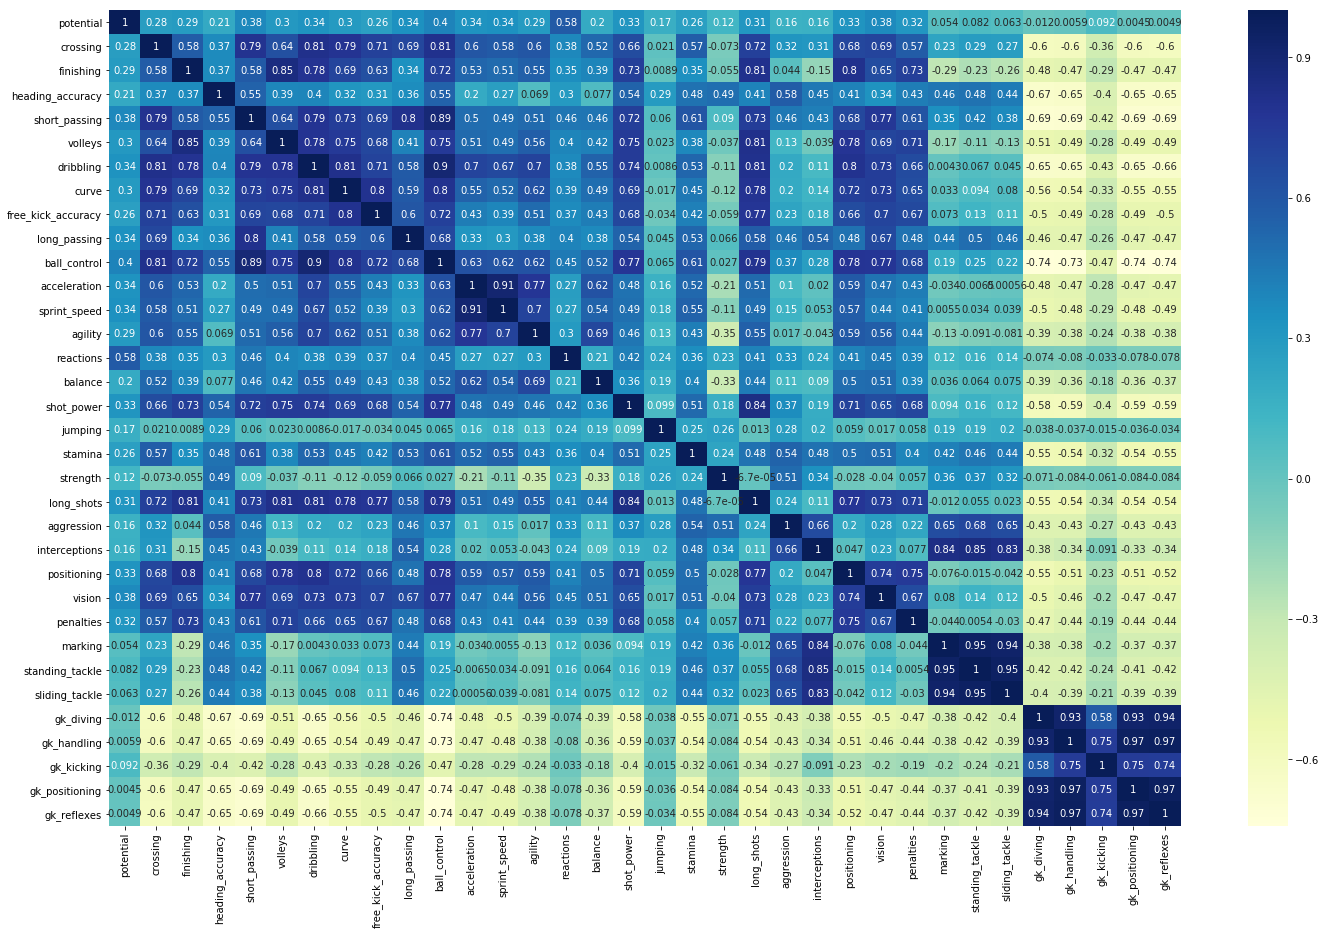

In [0]:
plt.figure(1,figsize=(24,15))
sns.heatmap(X.corr(),annot=True,cmap="YlGnBu")
plt.show()

Let us look at a typical row from our features: 

In [0]:
X.iloc[2]

potential             66.0
crossing              49.0
finishing             44.0
heading_accuracy      71.0
short_passing         61.0
volleys               44.0
dribbling             51.0
curve                 45.0
free_kick_accuracy    39.0
long_passing          64.0
ball_control          49.0
acceleration          60.0
sprint_speed          64.0
agility               59.0
reactions             47.0
balance               65.0
shot_power            55.0
jumping               58.0
stamina               54.0
strength              76.0
long_shots            35.0
aggression            63.0
interceptions         41.0
positioning           45.0
vision                54.0
penalties             48.0
marking               65.0
standing_tackle       66.0
sliding_tackle        69.0
gk_diving              6.0
gk_handling           11.0
gk_kicking            10.0
gk_positioning         8.0
gk_reflexes            8.0
Name: 2, dtype: float64

## Displaying  target values: 

In [25]:
y.head()

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0



# Split the Dataset into Training and Test Datasets



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324,shuffle=True)

In [21]:
y_test.mean()

overall_rating    68.635818
dtype: float64



# (1) Linear Regression: Fiting a model to the training set


# Performing Prediction using Linear Regression Model




In [22]:
model1= LinearRegression(n_jobs=-1)
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
RMSE1 = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred1))
print(y_test.mean())
print(RMSE1)

overall_rating    68.635818
dtype: float64
2.8053030468552103


In [24]:
len(X.columns)

34



# Performing Prediction using Decision tree Regression Model



In [0]:
score=[]
for i in range(2,len(X.columns)+1):
  model2= DecisionTreeRegressor(max_depth=10+i,max_features=i)
  model2.fit(X_train, y_train)
  y_pred2=model2.predict(X_test)
  RMSE2 = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred2))
  score.append(RMSE2)

In [94]:
RMSE2

1.4292009130459054

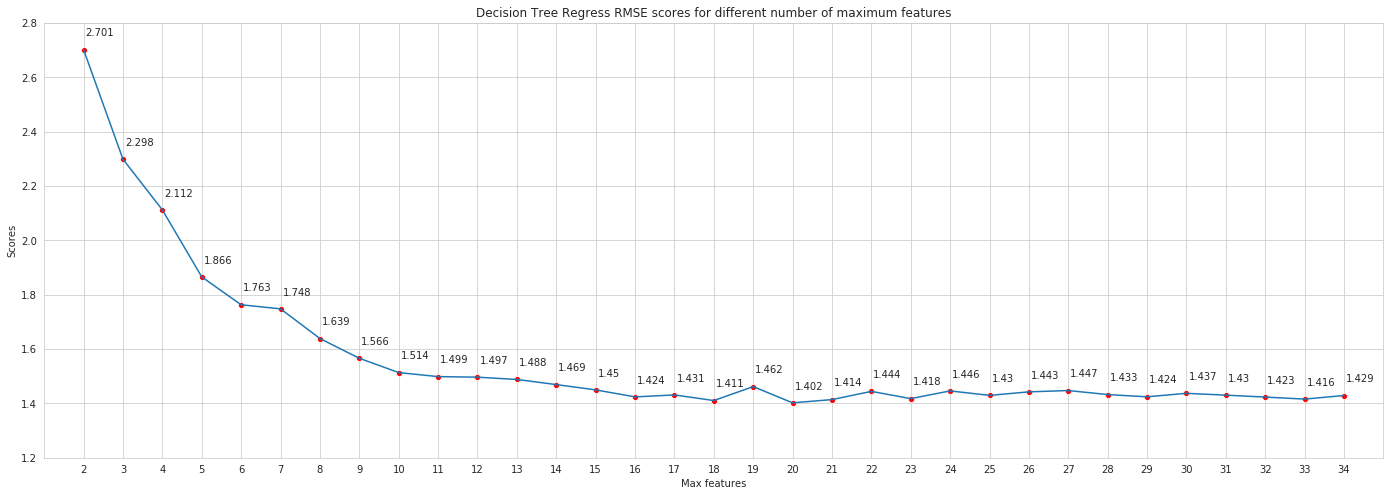

In [249]:
plt.figure(1,figsize=(24,8))
list1=list(range(2,len(X.columns)+1))

sns.lineplot(x=list1,y=score)
sns.scatterplot(x=list1,y=score,color='red',legend='brief')
for i in range(len(list1)):
  plt.text(x =list1[i]+0.05 , y =score[i]+0.05, s =round(score[i],3), size = 10)


plt.xticks([i for i in range(2, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.xlim(1,35)
plt.ylim(1.2,2.8)
plt.ylabel('Scores')
plt.title('Decision Tree Regress RMSE scores for different number of maximum features')
plt.show()

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

What is the mean of the expected target value in test set ?
<br><br></p>


In [0]:
score1=[]
estimators=[1,2,4,6,8,10,12,14,18,20]
for i in estimators:
  model3= RandomForestRegressor(n_jobs=-1,n_estimators=i,max_depth=5+i)
  model3.fit(X_train, y_train.values.ravel())
  y_pred3=model3.predict(X_test)
  RMSE3 = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred3))
#print(y_test.mean())
  score1.append(RMSE3)

In [0]:
sns.set_style('whitegrid')

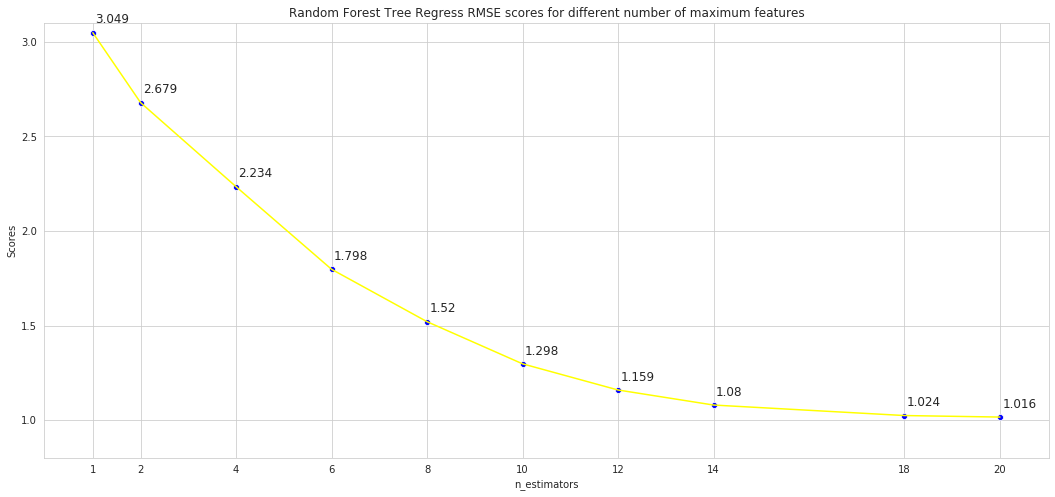

In [250]:
plt.figure(1,figsize=(18,8))
sns.lineplot(x=estimators,y=score1,color='yellow')
sns.scatterplot(x=estimators,y=score1,color='blue')
for i in range(len(estimators)):
  plt.text(x =estimators[i]+0.05 , y =score1[i]+0.05, s =round(score1[i],3), size = 12)
plt.xticks(estimators)
plt.ylim(0.8,3.1)
#plt.xlim(1,20)
plt.xlabel('n_estimators')
plt.ylabel('Scores')
plt.title('Random Forest Tree Regress RMSE scores for different number of maximum features')
plt.show()

In [153]:
print("Computed Random Forest Scores By tuning")
score1

Computed Random Forest Scores By tuning


[3.0486365668023834,
 2.679029494346975,
 2.234390615107579,
 1.7975139549648316,
 1.5204493661964176,
 1.297507114456896,
 1.1591194818933224,
 1.0795481230210418,
 1.0239775263610167,
 1.0159395639400142]

# Overall Best Random Forest Regressor Model 
# Lets do some further hyperparameter Tuning
* n_estimators = 20,  max_depth = 25
## let's play with max_features = [ 'auto' , 'sqrt' , 'log2' ]
* Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered. However, this is not necessarily true as this decreases the diversity of individual tree which is the USP of random forest. 

In [185]:
m_fea=['auto','sqrt','log2',28,34]
score_fea=[]
for i in m_fea:
  model3_rf= RandomForestRegressor(n_jobs=-1,n_estimators=20,max_depth=25,max_features=i)
  model3_rf.fit(X_train, y_train.values.ravel())
  y_pred3_rf=model3_rf.predict(X_test)
  RMSE3_rf = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred3_rf))
#print(y_test.mean())
  score_fea.append(RMSE3_rf)
  print('max_features :'+str(i))
  print(RMSE3_rf)


max_features :auto
1.0167321847109922
max_features :sqrt
0.9515871532432036
max_features :log2
0.9432887814898409
max_features :28
0.9846227589027606
max_features :34
1.0170583844519356


In [0]:
max_feat=pd.DataFrame({'Name':m_fea,'RMSE_Score':score_fea})

In [202]:
max_feat

,Name,RMSE_Score
0,auto,1.016732
1,sqrt,0.951587
2,log2,0.943289
3,28,0.984623
4,34,1.017058


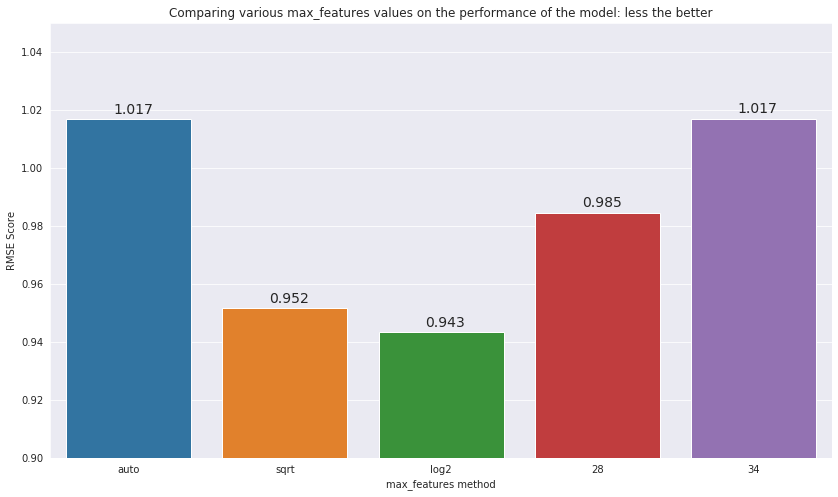

In [234]:
plt.figure(1,figsize=(14,8))
sns.barplot(x='Name',y='RMSE_Score',data=max_feat)
for i in range(5):
  plt.text(x =i-0.1 , y = score_fea[i]+0.002, s =round(score_fea[i],3), size = 14)

plt.ylim(0.9,1.05)
plt.ylabel('RMSE Score')
plt.xlabel('max_features method')
plt.title('Comparing various max_features values on the performance of the model: less the better')
plt.show()

# Here is simple model to explain how Random Forest Regression works.
# Below is tree structure to exlain the decision taken

In [87]:
reg_rf= RandomForestRegressor(n_jobs=-1,n_estimators=1,max_depth=3,bootstrap=False)
reg_rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

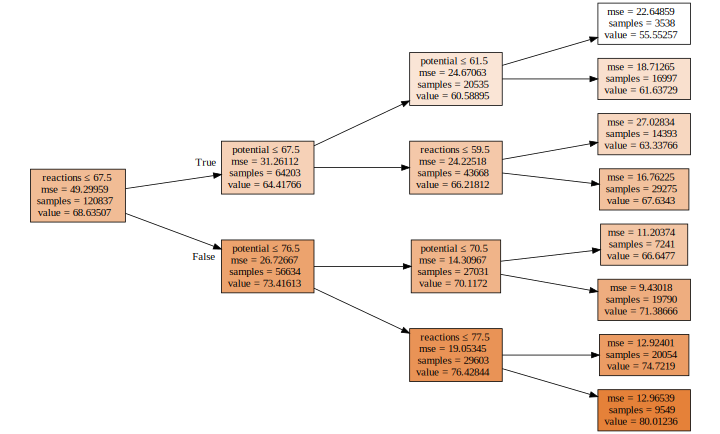

In [89]:
draw_tree(reg_rf.estimators_[0], X_train, precision=5)

In [95]:
print(RMSE1)
print(RMSE2)
print(RMSE3)

2.8053030468552103
1.4292009130459054
1.0159395639400142


# KNeighboursRegressor Not that good as shown by RMSE error

In [27]:
model5= KNeighborsRegressor()
model5.fit(X_train, y_train.values.ravel())
y_pred5=model5.predict(X_test)
RMSE5 = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred5))
print(y_test.mean())
print(RMSE5)

overall_rating    68.635818
dtype: float64
1.5443597253788965


# Gradient Boosting Regressor has an RMSE of 1.777

In [152]:
estimators_gb=[18,20,24,28,30,32,36,40,60,80,100,120]
score3=[]
for i in estimators_gb:

  model6= GradientBoostingRegressor(n_estimators=i)
  model6.fit(X_train, y_train.values.ravel())
  y_pred6=model6.predict(X_test)
  RMSE6 = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred6))
  score3.append(RMSE6)
  print("estimators :"+str(i))
  print(RMSE6)


estimators :18
3.174325694687693
estimators :20
3.015693332104829
estimators :24
2.776171105383216
estimators :28
2.6166959590379837
estimators :30
2.5250004458268758
estimators :32
2.44443959748027
estimators :36
2.310991852257541
estimators :40
2.2243722617852213
estimators :60
1.9953350906490581
estimators :80
1.8667345371098194
estimators :100
1.7772623612743788
estimators :120
1.710458948171262


In [0]:
sns.set_style('whitegrid')

In [254]:
len(score3)==len(estimators_gb)

True

Text(0.5, 1.0, 'Gradient boosting Regressor RMSE scores for different number of estimators')

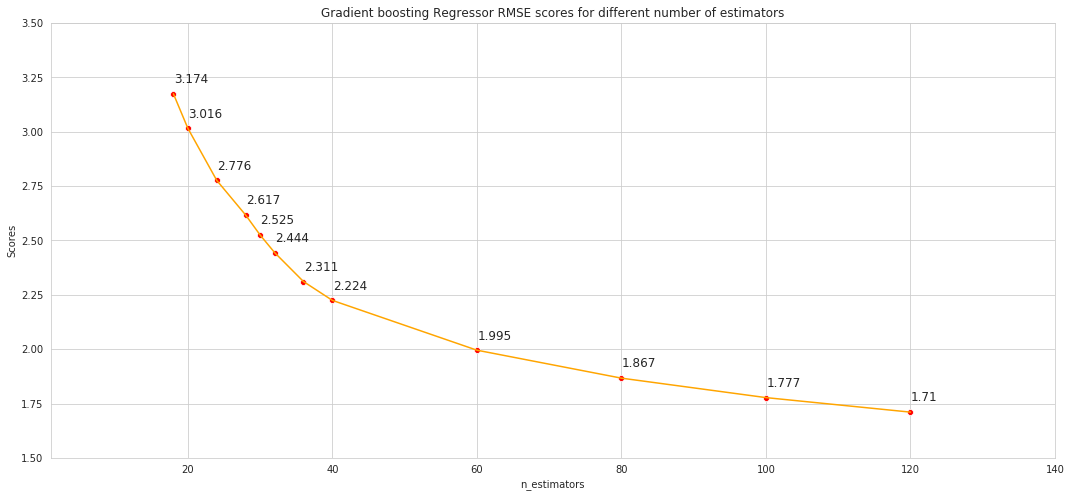

In [263]:
plt.figure(1,figsize=(18,8))
sns.lineplot(x=estimators_gb,y=score3,color='orange')
sns.scatterplot(x=estimators_gb,y=score3,color='red')
for i in range(len(estimators_gb)):
  plt.text(x =estimators_gb[i]+0.05 , y =score3[i]+0.05, s =round(score3[i],3), size = 12)
#plt.xticks(estimators)
plt.ylim(1.5,3.5)
plt.xlim(1,140)
plt.xlabel('n_estimators')
plt.ylabel('Scores')
plt.title('Gradient boosting Regressor RMSE scores for different number of estimators')

In [0]:
regressor=pd.DataFrame({'Linear regression':[RMSE1],'Descicion Tree Regressor':[RMSE2],'Random Forest Regressor':[RMSE3_rf],'Gradient Boosting Regressor':[RMSE6],'K neighbours Regressor':[RMSE5]})


# RMSE of different Regreesor to see has performed best

In [176]:
regressor

,Linear regression,Descicion Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor,K neighbours Regressor
0,2.805303,1.429201,0.945273,1.710459,1.54436


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

#For comparision: Mean of the expected target value in test set 
<br><br></p>


In [98]:
y.mean()

overall_rating    68.635317
dtype: float64

# Mean is 68.635317

In [0]:
prediction=pd.DataFrame({'Test':y_test.overall_rating,'DecisionTree':y_pred2,'RandomForest':y_pred3_rf,'GradientBoosting':y_pred6})
prediction=prediction.reset_index(drop=True)

In [180]:
print(prediction.shape)
prediction.head(15)

(59517, 4)


,Test,DecisionTree,RandomForest,GradientBoosting
0,66.0,62.0,64.700000,63.764344
1,83.0,84.0,82.300000,83.749271
2,65.0,63.0,62.374524,62.606637
3,74.0,74.0,74.500000,75.985176
4,65.0,65.0,64.800000,64.700763
5,63.0,63.0,63.158333,61.423877
6,78.0,77.0,77.100000,76.005848
7,67.0,67.0,67.750000,68.202608
8,64.0,65.0,66.400000,64.929283
9,67.0,67.0,67.100000,69.962976


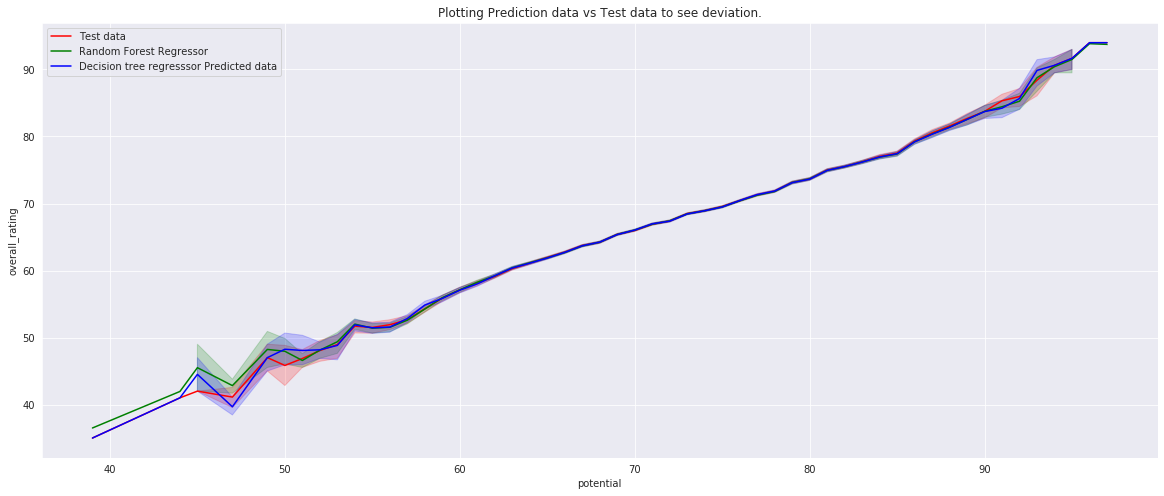

In [181]:
sns.set_style('darkgrid')
plt.figure(1,figsize=(20,8))
sns.lineplot(x=X_test.potential,y=y_test['overall_rating'],color='red',label='Test data')
sns.lineplot(x=X_test.potential,y=y_pred3,color='green',label='Random Forest Regressor')
sns.lineplot(x=X_test.potential,y=y_pred2,color='blue',label='Decision tree regresssor Predicted data')
plt.title("Plotting Prediction data vs Test data to see deviation.")
plt.legend()
plt.show()

# As can been seen above prediction is fairly accurate.
## With a RMSE of less than < 0.9452 
# Given A mean of 68.635
# It's fairly good Prediction